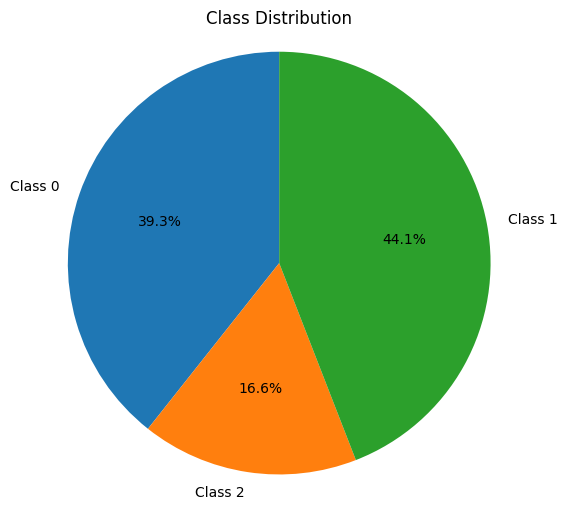

In [1]:
import os
import matplotlib.pyplot as plt


images_dir = r'../dataset/compiled-new/images'
labels_dir = r'../dataset/compiled-new/labels'

class_counts = {}

for label_file in os.listdir(labels_dir):
    if label_file.endswith('.txt'):
        with open(os.path.join(labels_dir, label_file), 'r') as f:
            lines = f.readlines()
            for line in lines:
                class_id = line.strip().split()[0]
                class_counts[class_id] = class_counts.get(class_id, 0) + 1

# Prepare data for pie chart
labels = [f'Class {k}' for k in class_counts.keys()]
sizes = list(class_counts.values())

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.axis('equal')
plt.show()

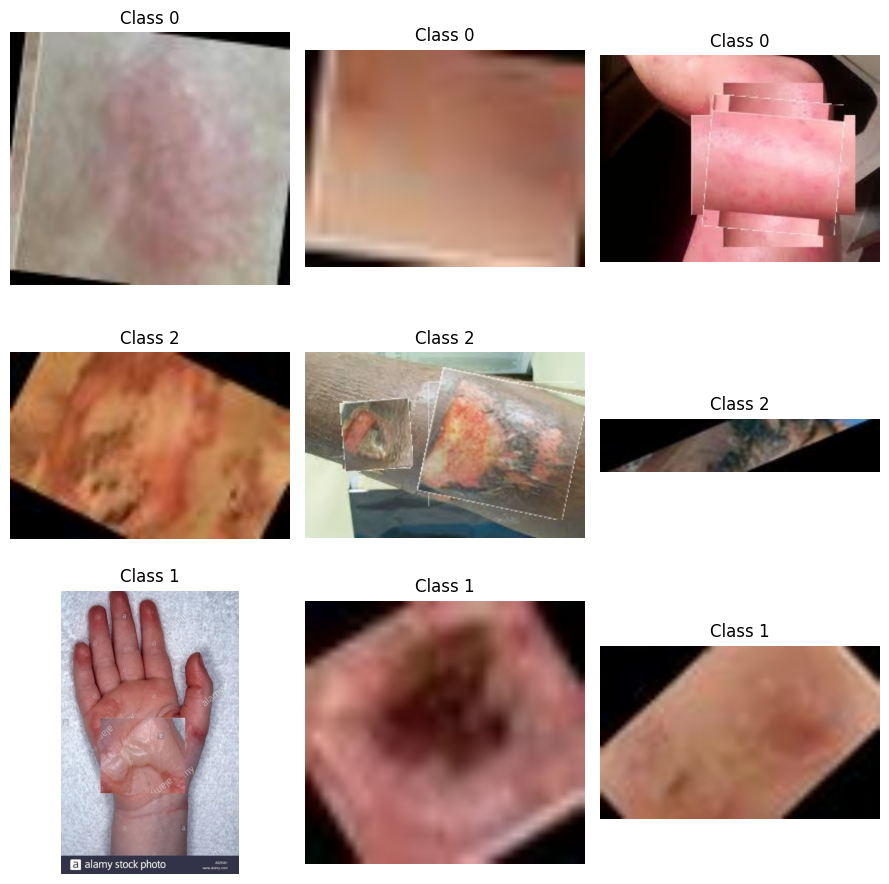

In [8]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

images_dir = r'../dataset/compiled-new/images'
labels_dir = r'../dataset/compiled-new/labels'

# Collect all image paths for each class
class_images = {}

for label_file in os.listdir(labels_dir):
    if label_file.endswith('.txt'):
        with open(os.path.join(labels_dir, label_file), 'r') as f:
            lines = f.readlines()
            for line in lines:
                class_id = line.strip().split()[0]
                base_name = os.path.splitext(label_file)[0]
                for ext in ['.jpg', '.jpeg', '.png']:
                    img_path = os.path.join(images_dir, base_name + ext)
                    if os.path.isfile(img_path):
                        class_images.setdefault(class_id, []).append(img_path)
                        break

# Plot 3 random images per class
num_samples = 3
plt.figure(figsize=(num_samples * 3, len(class_images) * 3))

for row_idx, (class_id, img_paths) in enumerate(class_images.items()):
    random.shuffle(img_paths)
    for col_idx, img_path in enumerate(img_paths[:num_samples]):
        plt.subplot(len(class_images), num_samples, row_idx * num_samples + col_idx + 1)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(f'Class {class_id}')
        plt.axis('off')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Class Distribution (by image count in sorted/)')

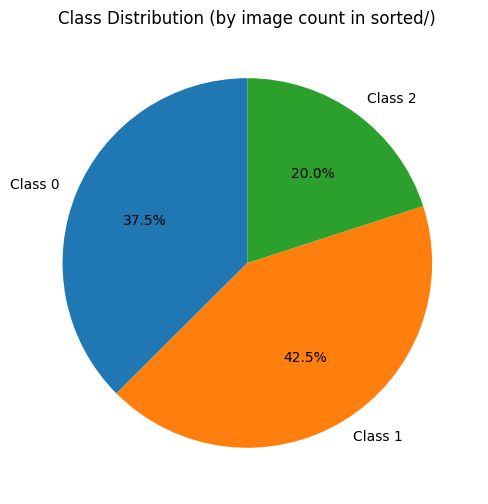

In [9]:
import os
import matplotlib.pyplot as plt

base_dir = r'../dataset-allin/sorted'
class_counts = {}

for class_id in ['0', '1', '2']:
    class_dir = os.path.join(base_dir, class_id)
    if os.path.isdir(class_dir):
        num_images = len([f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        class_counts[class_id] = num_images

# Pie chart
labels = [f'Class {k}' for k in class_counts.keys()]
sizes = list(class_counts.values())

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution (by image count in sorted/)')

In [10]:
for class_id, count in class_counts.items():
    print(f"Class {class_id}: {count} images")

Class 0: 689 images
Class 1: 782 images
Class 2: 368 images
